In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2, F1, F2, w1, w2, n1, n2, s = p

    f =[y1,
      (-b1*y1-k1*(x1-L1)+n1*(x1*x1*x1)-k2*(x1-x2)+n2*(x1-x2)*(x1-x2)*(x1-x2)+F1*np.cos(w1*s))/m1,
       y2,
       (-b2*y2-k2*(x2-x1-L2)+n2*(x2-x1)*(x2-x1)*(x2-x1)+F2*np.cos(w2*s))/m2]
    return f

In [15]:
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1
m2 = 1
# Spring constants
k1 = 0.4
k2 = 1.808
# Natural lengths
L1 = 0
L2 = 0
# Friction coefficients
b1 = 0
b2 = 0
# Nonlinear coefficients
n1 = -1/6
n2 =-1/10
# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = -0.5
y1 = 0.5
x2 = 3.001
y2 = 5.9
#Time
s = 0
#Forces
F1= 0
F2= 0
#Phase
w1= 0
w2= 0
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 200.0
numpoints = 1500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2, F1, F2, w1, w2, n1, n2, s]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs3.2.dat', 'w') as f:
    # Print & save the solution.
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3], file=f)

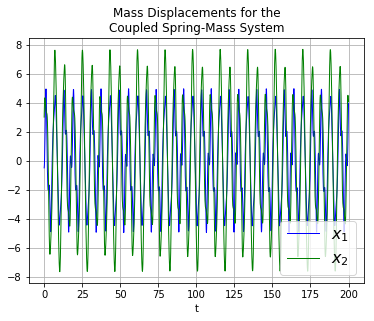

In [16]:
# Plot the solution that was generated
#Ejemplo 3.2 del archivo 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
%matplotlib inline 
t, x1, xy, x2, y2 = loadtxt('two_springs3.2.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
# hold(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('two_springs3.2.png', dpi=100)

(-5.4520905772950004,
 5.4547228664949996,
 -8.4239620366580006,
 8.4423567477779997)

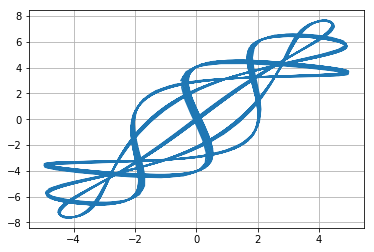

In [17]:
import matplotlib
plot(x1,x2)
grid(True)
matplotlib.pyplot.axis('on')

(-5.4520905772950004,
 5.4547228664949996,
 -8.4116759798359997,
 7.9538033020960004)

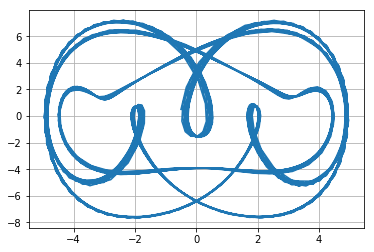

In [18]:
import matplotlib
# y1 = xy 
plot(x1,xy)
grid(True)
matplotlib.pyplot.axis('on')

(-8.4239620366580006,
 8.4423567477779997,
 -8.6319274011679994,
 8.6853255465080004)

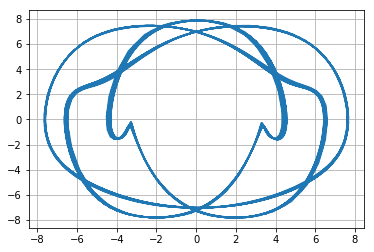

In [19]:
import matplotlib
plot(x2,y2)
grid(True)
matplotlib.pyplot.axis('on')